## Prepare the Utility Matrix

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = '../../../datasets'
!ls $DATASET_PATH

books		    books_ratings.csv  refined_metadata.pkl
books_lexile.tar    lexile.json        refined_ratings.csv
books_meta.json.gz  lexile.pkl
books_meta.pkl	    merged_df.pkl


In [3]:
utility_df = pd.read_csv(DATASET_PATH+'/books_ratings.csv', header=None, names=['user', 'item', 'rating', 'timestamp'])

In [4]:
metadata_df = pd.read_pickle(DATASET_PATH+"/merged_df.pkl")

In [5]:
len(utility_df)

22507155

In [6]:
book_ids = metadata_df['asin']

In [7]:
refined_utility = utility_df.loc[utility_df['item'].isin(book_ids)]

In [8]:
len(refined_utility)

331276

In [9]:
len(refined_utility['user'].unique())

258905

In [10]:
refined_utility.to_csv(DATASET_PATH+"/refined_ratings.csv", index=False)

#### Run after restart!

In [3]:
refined_utility = pd.read_csv(DATASET_PATH+"/refined_ratings.csv", names=['user', 'item', 'rating', 'timestamp']) # <----- run this!

In [5]:
user_rating_count = refined_utility.groupby(['user']).count().sort_values(by=['item'], ascending=False)

In [16]:
freq_users = user_rating_count[user_rating_count['item']>=5].index

In [18]:
refined_utility = refined_utility[refined_utility['user'].isin(freq_users)]

In [39]:
print "Number of ratings:", len(refined_utility.index)

Number of ratings: 42472


In [40]:
print "Number of users:", len(refined_utility['user'].unique())

Number of users: 3822


In [41]:
print "Number of items:", len(refined_utility['item'].unique())

Number of items: 6052


#### Dataset has been reduced to include only users having more than 5 rated books!

In [23]:
refined_utility.to_csv(DATASET_PATH+"/refined_ratings.csv", index=False, header=None)

In [24]:
utility_df = refined_utility.pivot(index='user', columns='item', values='rating')

In [26]:
utility_df.to_pickle(path=DATASET_PATH+'/utility_df.pkl')

In [43]:
rating_freq = refined_utility.groupby('rating').count()

#### Rating frequencies

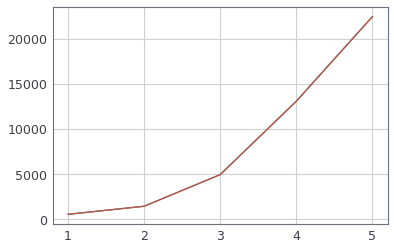

In [52]:
plt.plot(rating_freq)